In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


Training Data

In [2]:
# mengunduh dataset
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2024-04-24 01:51:29--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 104.18.42.227, 172.64.145.29, 2606:4700:4400::ac40:911d, ...
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|104.18.42.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Cookie coming from dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com attempted to set domain to digitaloceanspaces.com
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   257MB/s    in 0.3s    

2024-04-24 01:51:29 (257 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [3]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = "/tmp/messy_vs_clean_room.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [4]:
# print sub directory train
os.listdir('/tmp/images/train')

['clean', 'messy']

In [5]:
# print sub-directory val
os.listdir('/tmp/images/val')

['clean', 'messy']

In [6]:
# menerapkan ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# membuat train datagen
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

# membuat test datagen
test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [7]:
# menyiapkan data latih dan validasi dari kumpulan gambar dengan fungsi flow()

train_generator = train_datagen.flow_from_directory(
    train_dir, # data yang dilatih
    target_size = (150,150), # mengubah resolusi gambar menjadi 150 x 150 px
    batch_size = 4,
    # ini menggunakan klasifikasi 2 kelas, sehingga menggunakan binary
    class_mode = 'binary'
)

# membuat validasi
validation_generator = test_datagen.flow_from_directory(
    validation_dir, # data yang di validasi
    target_size = (150,150), # menubah resolusi gambar menjadi 150 x 150
    batch_size = 4,
    class_mode = 'binary'
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [9]:
# membuat algoritma convolutional neural network (CNN)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [11]:
# melakukan compiling dan menentukan loss function serta optimizer
# meng-compile dengan menggunakan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']
    )

In [13]:
# train model menggunakan model.fit
model.fit(
    train_generator,
    steps_per_epoch=25, # berapa batch yang akan dieksekusi per epoch
    epochs = 20,# menambah epoch apabila dirasa kurang optimal
    validation_data = validation_generator, # menampilkan akurasi pengujian data validadsi
    validation_steps = 5, # berapa batch yang dieksekusi setiap epoch
    verbose = 2
)

Epoch 1/20
25/25 - 15s - loss: 0.7030 - accuracy: 0.5100 - val_loss: 0.7047 - val_accuracy: 0.5000 - 15s/epoch - 618ms/step
Epoch 2/20
25/25 - 14s - loss: 0.7019 - accuracy: 0.4300 - val_loss: 0.6923 - val_accuracy: 0.5000 - 14s/epoch - 579ms/step
Epoch 3/20
25/25 - 15s - loss: 0.6941 - accuracy: 0.4400 - val_loss: 0.6928 - val_accuracy: 0.5000 - 15s/epoch - 592ms/step
Epoch 4/20
25/25 - 13s - loss: 0.6932 - accuracy: 0.4900 - val_loss: 0.6915 - val_accuracy: 0.5000 - 13s/epoch - 534ms/step
Epoch 5/20
25/25 - 14s - loss: 0.7017 - accuracy: 0.5300 - val_loss: 0.6893 - val_accuracy: 0.5500 - 14s/epoch - 547ms/step
Epoch 6/20
25/25 - 13s - loss: 0.6964 - accuracy: 0.4600 - val_loss: 0.6926 - val_accuracy: 0.5000 - 13s/epoch - 538ms/step
Epoch 7/20
25/25 - 14s - loss: 0.6939 - accuracy: 0.4600 - val_loss: 0.6928 - val_accuracy: 0.5000 - 14s/epoch - 544ms/step
Epoch 8/20
25/25 - 13s - loss: 0.6960 - accuracy: 0.4300 - val_loss: 0.6840 - val_accuracy: 0.5000 - 13s/epoch - 535ms/step
Epoch 9/

Predict Model

Saving bedroom2.jpg to bedroom2.jpg
1/1 [==============================] - 0s 45ms/step
bedroom2.jpg
clean


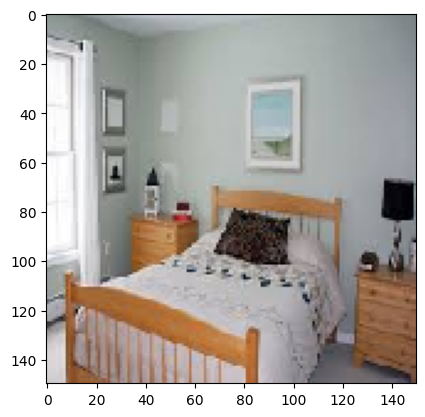

In [17]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting image
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes == 0:
    print('clean')
  else:
    print('messy')